<h1>Welcome</h1>

Hello and welcome to the tutorial.

In this tutorial our goal is to learn some algorithms and use them to learn from data.

First of all, let us import the stuff we need....

In [6]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h1>Getting The Data</h1>

First of all, what kind of data we will use in this experiment?

We will try to learn by a example containing two classes.
The running example in this tutorial will be a straight line dividing a plane. The two divisions of the plane are two classes.

So, the straight line is like this,
$x_2=mx_1+c$

Let us define the classes,

Class 1: $mx_1+c-x_2 > 0$

class 2: $mx_1+c-x_2 < 0$

Now that you see the classes we can define the mapping function to be,

$f(x_1,x_2) = sign(mx_1+c-x_2)$

so let us break it down a bit. Let $m=\frac{w_1}{|w_2'|}$ and lets do some computation,

$=> f(x_1,x_2) = sign(\frac{w_1}{|w_2'|}x_1+c-x_2)$

$=> f(x_1,x_2) =sign(\frac{w_1x_1+|w_2'|c-|w_2'|x_2}{|w_2'|})$

now if we remove the $|W_2'|$ from the denominator does the mapping change? It does not. So,

$=> f(x_1,x_2) =sign(w_1x_1+|w_2'|c-|w_2'|x_2)$

Now let us use, $-|w_2'| = w_2$ and $|w_2'|c=w_0$, and after rearragning,

$=> f(x_1,x_2) = sign(w_0 + w_1 x_1 + w_2 x_2)$

Here, accordng to machine learning term $w_0$ is called bias term, $w_1$ and $w_2$ are weight vector elements and $x_1$ and $x_2$ are called features.

Now, the whole weight vector can be wrtten as $\mathbf{w}=[w_0 \text{ } w_1 \text{ } w_2]^T$ and the feature vector can be written as, $\mathbf{x}=[1 \text{ } x_1 \text{ } x_2]^T$. So the function in the end becomes,

$=> y = f(\mathbf{x}) = sign(\mathbf{w}^T\mathbf{x})$

in machine learning term, the value of $y\in\{+1,-1\}$ is often called label. 

for simplicity we will tackle $x_1$ and $x_2$ that are within the range $[0.0,1.0]$.

In [7]:
w_1 = 8.0 #w_1
w_2p = 10.0 #w_2'

m = w_1/w_2p
c = 0.1

w_0 = w_2p*c
w_2 = -w_2p

w = np.array([w_0, w_1, w_2])

N = 30 #number of examples

x_1 = np.random.rand((N))
x_2 = np.random.rand((N))

x = np.array([np.ones(N), x_1, x_2])

print x.shape #should print (3L, 10L) [windows] or (3,10) [linux] showing 3x10 matrix
print w.shape #should pring (3L,) [windows] or (3,) [linux] showing 3x1 matrix
#note that it is row vector instead or column

#now let us compute the lebels
y = (w.dot(x)>0)*1.0+(w.dot(x)<0)*-1.0

print y

(3L, 30L)
(3L,)
[-1.  1. -1.  1. -1. -1.  1.  1.  1. -1.  1. -1. -1. -1.  1.  1. -1. -1.
  1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1.]


<h1>Visualization</h1>

Now let's visualize the data. Since it is data with only $2$ features, it will be easier to visualize.

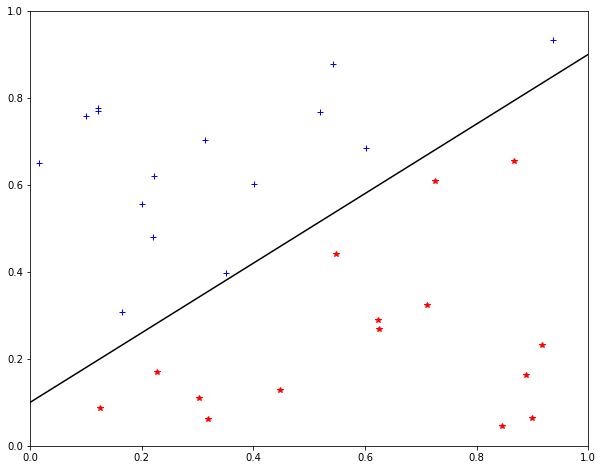

In [8]:
marker = {}
marker[-1.0] = '+b'
marker[1.0] = '*r'

for i in range(N):
    plt.plot(x_1[i],x_2[i],marker[y[i]])

x_1__ = np.arange(0,1.0,0.001)
x_2__ = m*x_1__+c #the line that separates the classes


plt.plot(x_1__,x_2__,'-k')
plt.xlim([0,1.0])
plt.ylim([0,1.0])

plt.show()

#you should see a perfectly separed data

In [20]:
ones = np.ones((1,N))
X2 = np.concatenate((x,ones),axis=0)
print X2.shape

(4L, 30L)
